# Exercício 03 - Descida de gradiente e taxa de aprendizado

Aluno: Frederico Luis de Azevedo

Professor: Dr. Francisco de Assis Boldt

## Bibliotecas e Inicialização

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.utils import Bunch
from sklearn.model_selection import train_test_split

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Bases de dados

Para este exercício serão construídas as seguintes bases de dados binárias:
- Base 1: 1000 registros
- Base 2: 10000 registros
- Base 3: 50000 registros

In [2]:
X1, Y1 = make_classification(n_samples=5000, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1)
X2, Y2 = make_classification(n_samples=10000, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1)
X2, Y2 = make_classification(n_samples=50000, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1)

## Classificador Utilizado

A tarefa será feita com o classificador SGDClassifier do pacote do scikit-learn com as seguintes funções de perda
- hinge
- log
- perceptron

As seguintes taxas de aprendizado serão utilizadas como parâmetro:
- 0.1
- 0.05
- 0.01

### Loss: Hinge | Samples: 5000 | learning rate: 0.1

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


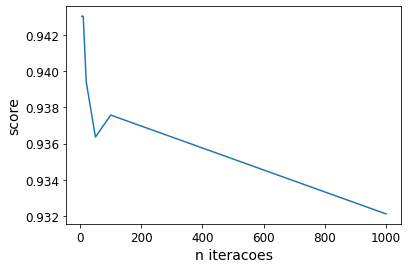

In [3]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.33)
    clf = SGDClassifier(loss="hinge", max_iter=n_iter, learning_rate = 'constant', eta0= 0.1)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))


plt.xlabel("n iteracoes")
plt.ylabel("score")
plt.plot(n_iters, scores) 

### Loss: Hinge | Samples: 5000 | learning rate: 0.05

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


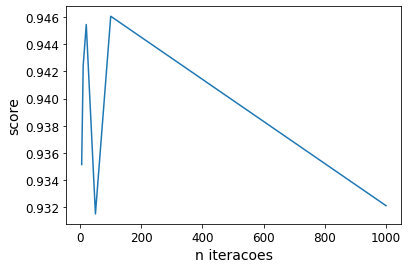

In [4]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.33)
    clf = SGDClassifier(loss="hinge", max_iter=n_iter, learning_rate = 'constant', eta0= 0.05)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plt.xlabel("n iteracoes")
plt.ylabel("score")
plt.plot(n_iters, scores) 

### Loss: Hinge | Samples: 5000 | learning rate: 0.01

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


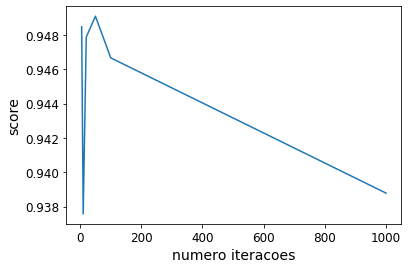

In [5]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.33)
    clf = SGDClassifier(loss="hinge", max_iter=n_iter, learning_rate = 'constant', eta0= 0.01)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plt.xlabel("numero iteracoes")
plt.ylabel("score")
plt.plot(n_iters, scores) 